# Canada House Price Prediction

**Final Project - AASD 4010 Deep Learning - I**
**Professor: Moe Fadaee**

**Group 2**
- Ahmed, Qusay
- Gonçalves, Ednaldo
- Khan, Sami 
- Osta, Mustafa
- Jack Chang

## Libraries

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Exploratory Data Analysis

In [2]:
# read the csv file
data = pd.read_csv("data/houses_edited.csv")
print(data.shape)

(15234, 22)


First 5 records of our dataset

In [3]:
data.head(5)

,index,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,...,full_address,lat,long,city_district,mean_district_income,district_code,final_price_transformed,final_price_log,bedrooms_ag,bedrooms_bg
0,0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...",855000,870000,2 + 1 beds,2,850.0,1,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,...,"38 Grenville St, Toronto , Ontario, Canada",43.661896,-79.385748,Bay Street Corridor,56526,76,2.391687,13.658857,2,1
1,1,"2 Cabot Crt, Toronto (W4502992) | Zoocasa",885000,898000,3 beds,2,NaN,6,Fantastic Opportunity To Live Within The Histo...,W4502992,...,"2 Cabot Crt, Toronto , Ontario, Canada",43.646982,-79.530356,Islington-City Centre West,52787,14,2.391803,13.693343,3,0
2,2,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...",550000,549900,1 beds,1,550.0,0,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,...,"30 Roehampton Ave, Toronto , Ontario, Canada",43.708472,-79.397498,Mount Pleasant West,57039,104,2.390053,13.217674,1,0
3,3,"514 - 65 East Liberty St, Toronto (C4515763) |...",665000,600000,1 + 1 beds,1,650.0,1,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,...,"65 East Liberty St, Toronto , Ontario, Canada",43.638399,-79.414448,Niagara,70623,82,2.390793,13.407542,1,1
4,4,"61 Twelfth St, Toronto (W4519375) | Zoocasa",825513,839000,2 beds,2,NaN,1,Location! Location! Location. Your Cottage In ...,W4519375,...,"61 Twelfth St, Toronto , Ontario, Canada",43.597096,-79.509612,New Toronto,44101,18,2.391568,13.623760,2,0


In [4]:
#get some information about our DataSet
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15234 entries, 0 to 15233
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    15234 non-null  int64  
 1   title                    15234 non-null  object 
 2   final_price              15234 non-null  int64  
 3   list_price               15234 non-null  int64  
 4   bedrooms                 15234 non-null  object 
 5   bathrooms                15234 non-null  int64  
 6   sqft                     10713 non-null  float64
 7   parking                  15234 non-null  int64  
 8   description              15185 non-null  object 
 9   mls                      15234 non-null  object 
 10  type                     15234 non-null  object 
 11  full_link                15234 non-null  object 
 12  full_address             15234 non-null  object 
 13  lat                      15234 non-null  float64
 14  long                  

,count,mean,std,min,25%,50%,75%,max
index,15234.0,9519.960943,4882.263253,0.000000,5677.500000,9803.500000,13667.750000,1.754300e+04
final_price,15234.0,882713.622752,618933.595240,103000.000000,535000.000000,715000.000000,989000.000000,1.318000e+07
list_price,15234.0,875093.005383,635807.189339,104900.000000,529000.000000,699900.000000,969900.000000,1.318000e+07
bathrooms,15234.0,2.122227,1.128122,1.000000,1.000000,2.000000,3.000000,1.400000e+01
sqft,10713.0,1116.469336,691.331305,250.000000,650.000000,900.000000,1300.000000,4.374000e+03
parking,15234.0,1.559144,1.345642,0.000000,1.000000,1.000000,2.000000,1.100000e+01
lat,15234.0,43.702658,0.056806,43.588176,43.652058,43.690963,43.755905,4.383937e+01
long,15234.0,-79.394666,0.095425,-79.621693,-79.454611,-79.395589,-79.335266,-7.912409e+01
mean_district_income,15234.0,56065.642576,32547.705435,25989.000000,34904.000000,50580.000000,67757.000000,3.080100e+05
district_code,15234.0,71.300643,38.673608,1.000000,39.000000,76.000000,101.000000,1.400000e+02


#### Create dummy columns for categorical variables

In [5]:
needed_columns = ['sqft', 'parking' , 'mean_district_income', 'bedrooms_ag', 'bedrooms_bg', 'type', 'final_price']

# houses_edited.info()
houses_dummies = pd.get_dummies(data[needed_columns])
predictors = houses_dummies.drop('final_price', axis=1).columns
houses_dummies.head(5)

,sqft,parking,mean_district_income,bedrooms_ag,bedrooms_bg,final_price,type_Att/Row/Twnhouse,type_Co-Op Apt,type_Co-Ownership Apt,type_Comm Element Condo,type_Condo Apt,type_Condo Townhouse,type_Detached,type_Link,type_Plex,type_Semi-Detached,type_Store W/Apt/Offc
0,850.0,1,56526,2,1,855000,False,False,False,False,True,False,False,False,False,False,False
1,NaN,6,52787,3,0,885000,False,False,False,False,False,False,False,False,False,True,False
2,550.0,0,57039,1,0,550000,False,False,False,False,True,False,False,False,False,False,False
3,650.0,1,70623,1,1,665000,False,False,False,False,True,False,False,False,False,False,False
4,NaN,1,44101,2,0,825513,False,False,False,False,False,False,True,False,False,False,False


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,15234.0,9519.960943,4882.263253,0.000000,5677.500000,9803.500000,13667.750000,1.754300e+04
final_price,15234.0,882713.622752,618933.595240,103000.000000,535000.000000,715000.000000,989000.000000,1.318000e+07
list_price,15234.0,875093.005383,635807.189339,104900.000000,529000.000000,699900.000000,969900.000000,1.318000e+07
bathrooms,15234.0,2.122227,1.128122,1.000000,1.000000,2.000000,3.000000,1.400000e+01
sqft,10713.0,1116.469336,691.331305,250.000000,650.000000,900.000000,1300.000000,4.374000e+03
parking,15234.0,1.559144,1.345642,0.000000,1.000000,1.000000,2.000000,1.100000e+01
lat,15234.0,43.702658,0.056806,43.588176,43.652058,43.690963,43.755905,4.383937e+01
long,15234.0,-79.394666,0.095425,-79.621693,-79.454611,-79.395589,-79.335266,-7.912409e+01
mean_district_income,15234.0,56065.642576,32547.705435,25989.000000,34904.000000,50580.000000,67757.000000,3.080100e+05
district_code,15234.0,71.300643,38.673608,1.000000,39.000000,76.000000,101.000000,1.400000e+02


#### Extract the top-features from our training dataset that have the highest correlation with the Price

<Axes: >

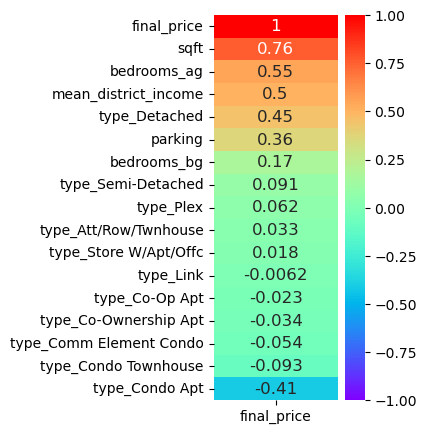

In [7]:
top_features = houses_dummies.corr()[['final_price']].sort_values(by=['final_price'],ascending=False).head(30)
plt.figure(figsize=(2,5))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 12},vmin=-1)

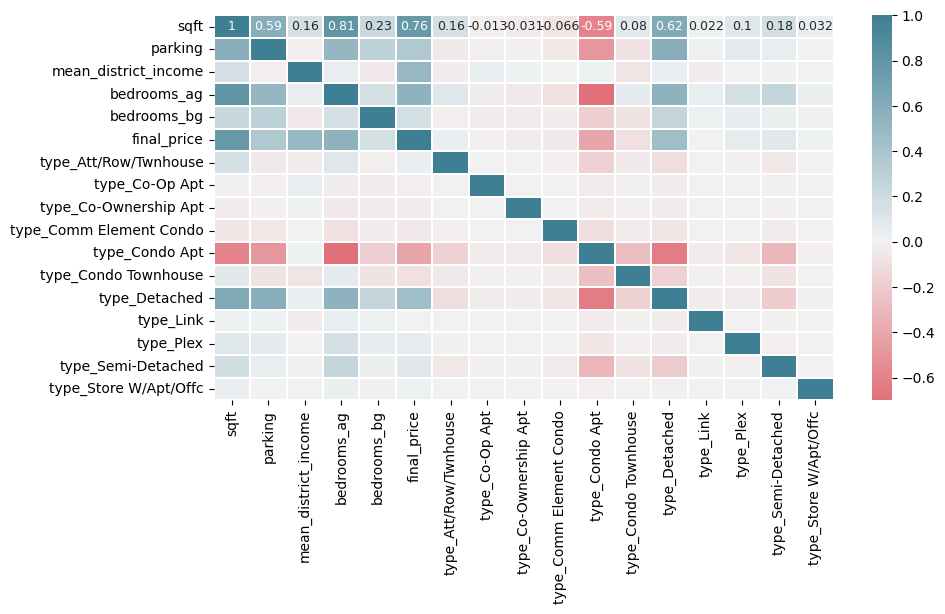

In [8]:
# Create features Heatmap to see how feature are correlated

def correlantion_heatmap(df, center = None):
    fig, ax = plt.subplots(figsize = [10,5])
    colormap = sns.diverging_palette(10, 220, as_cmap=True)
    fig = sns.heatmap(df.corr(),
                cmap = colormap,
               center = center,
                annot = True,
                linewidths = 0.1,
                annot_kws={'fontsize':9})
    
    
correlantion_heatmap(houses_dummies, center=0)

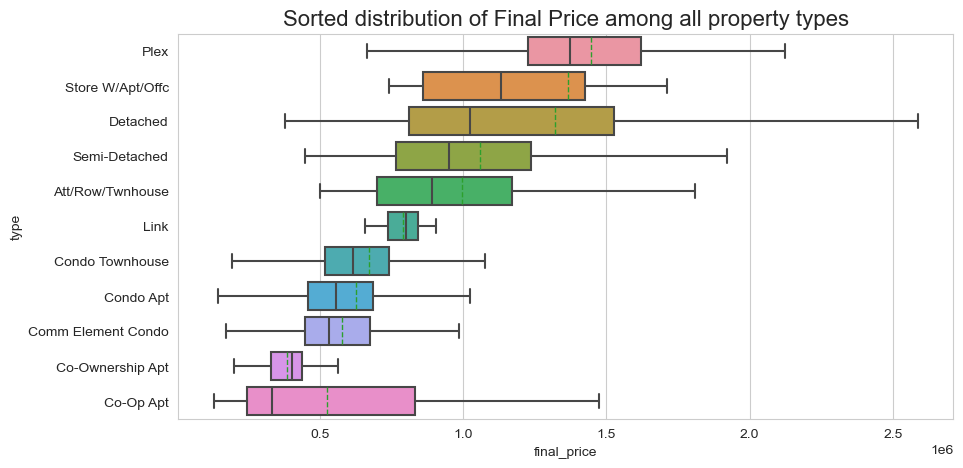

In [9]:
houses_types = pd.unique(data.type)
sns.set_style("whitegrid")
plt.subplots(figsize=[10,5])
sorted_medians = sorted([(data[data.type==st].final_price.median(), st) for st in houses_types], reverse=True)
sns.boxplot(y = 'type', x = 'final_price', data = data, orient='h', showfliers=False, meanline =True, showmeans=True, 
            order=[b for a,b in sorted_medians])
plt.title('Sorted distribution of Final Price among all property types', fontsize=16)
plt.show()

### Scatterplot these important features

/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

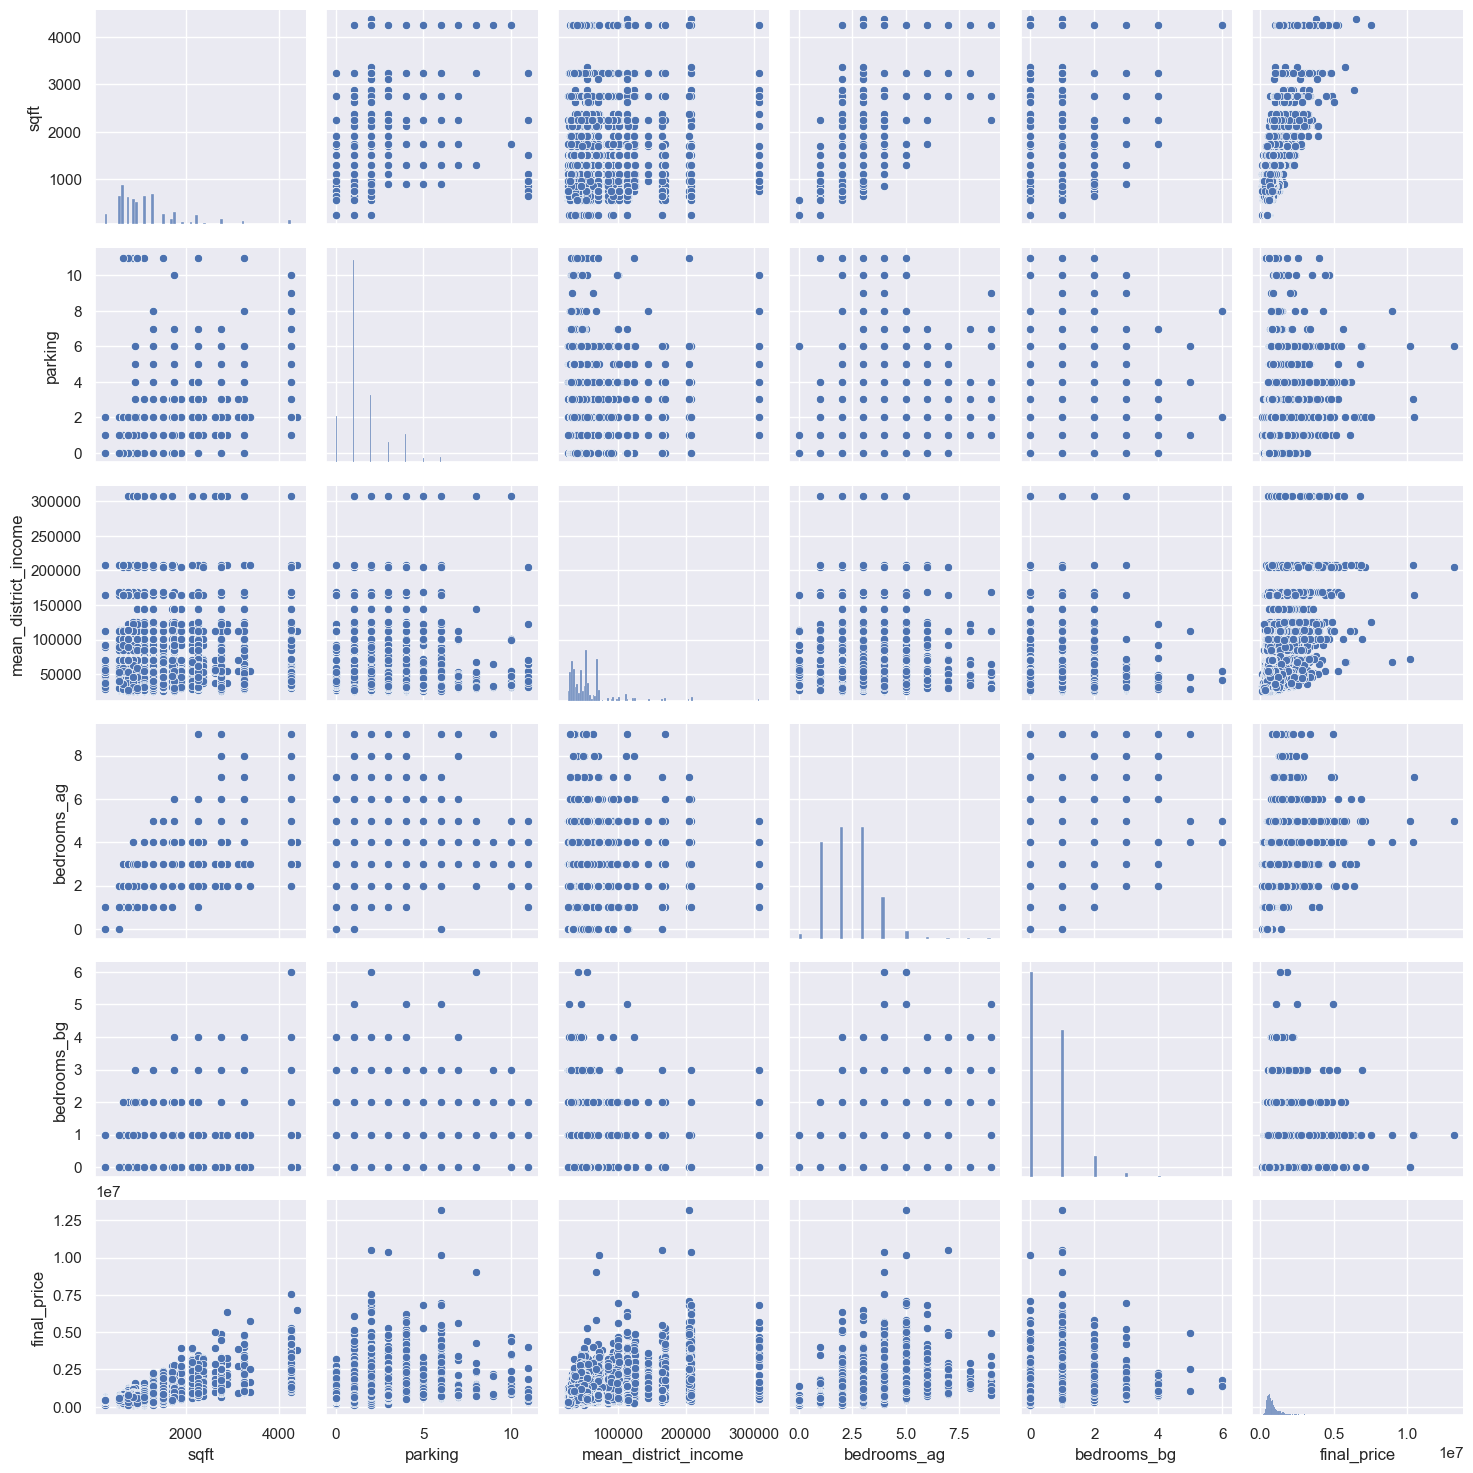

In [10]:
#scatterplot
sns.set()
sns.pairplot(data[needed_columns], height = 2.5)
plt.show();

<Axes: xlabel='final_price', ylabel='sqft'>

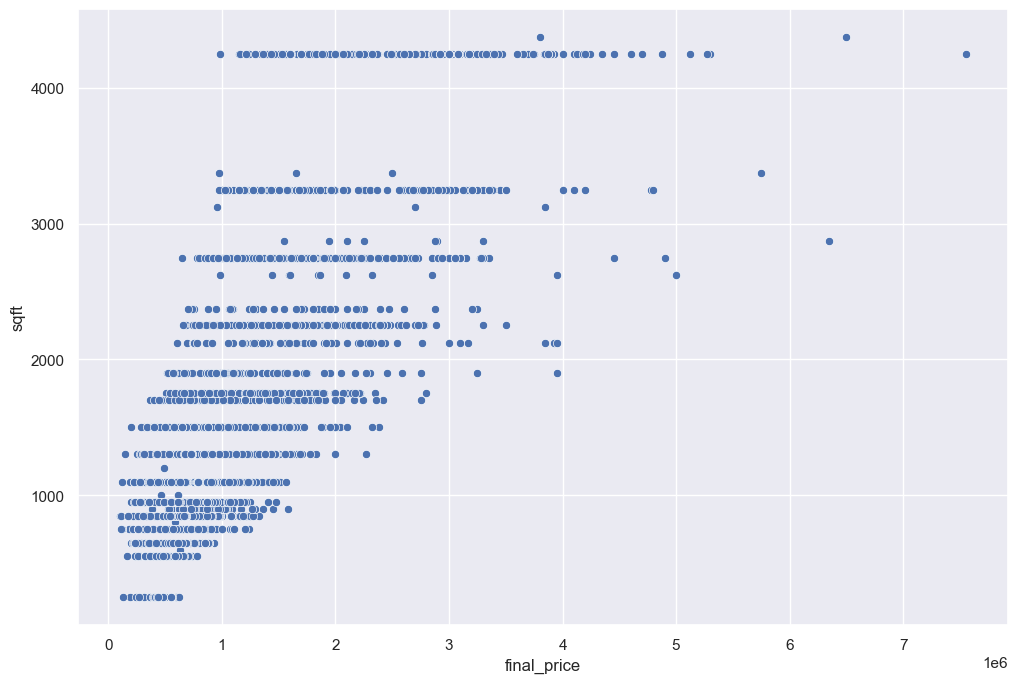

In [11]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='final_price',y='sqft',data=data)

<Axes: xlabel='bedrooms_bg', ylabel='final_price'>

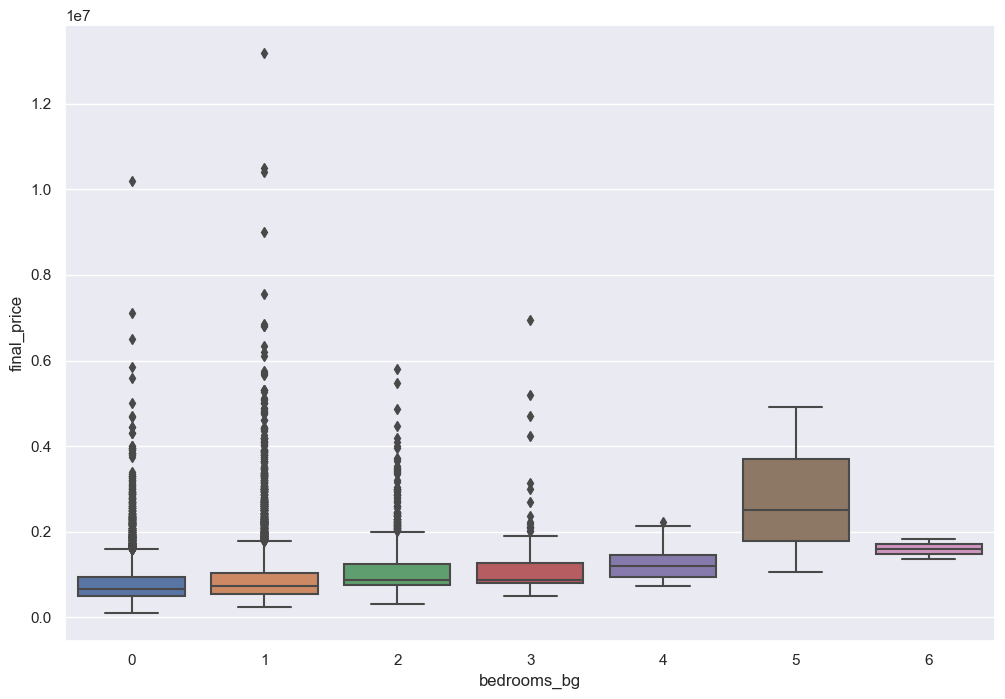

In [12]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (12,8))
sns.boxplot(x = 'bedrooms_bg',y = 'final_price', data = data)

/var/folders/bm/mbwgf9yx4x18r_3xghcr94d80000gn/T/ipykernel_49633/3588640599.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['final_price'])
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


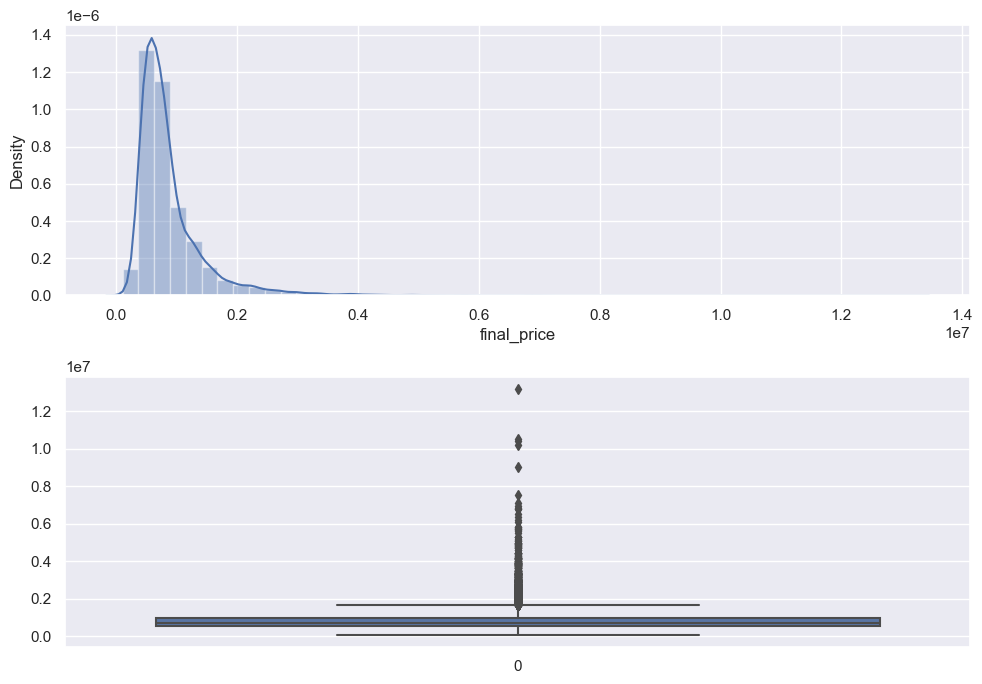

In [13]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(data['final_price'])
fig.add_subplot(2,1,2)
sns.boxplot(data['final_price'])
plt.tight_layout()

# 2. Scaling and Train Test Split

In [14]:
# Converting 'True' to 1 and 'False' to 0 in all columns
#data = houses_dummies.map(lambda x: 1 if x == 'True' else (0 if x == 'False' else x))

In [18]:
# Removing lines that contain at least one NaN value
data = houses_dummies.dropna()

In [19]:
from sklearn.model_selection import train_test_split

#filling NA's with the mean of the column:
#houses_dummies = data.fillna(data.mean())

X = data.drop('final_price',axis =1).values
y = data['final_price'].values

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# 3. Feature Scalling

In [20]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

# 4. Methods

## Method 1: Multiple Linear Regression

In [21]:
#Liner Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
regressor.intercept_
regressor.coef_

array([ 3.67918121e+05, -2.81606498e+04,  1.79607534e+05, -5.29693326e+04,
        2.55478508e+03,  2.25083234e+16,  6.81877518e+15,  8.57591166e+15,
        2.24251376e+16,  7.58141766e+16,  4.95157795e+16,  5.29237751e+16,
        5.90646867e+15,  8.79808509e+15,  3.05429699e+16,  1.96992126e+15])

In [22]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,510000,6.937689e+05
1,642000,4.954849e+05
2,895000,1.200869e+06
3,832000,8.072889e+05
4,518000,8.481009e+05
5,515000,7.398289e+05
6,568000,5.262769e+05
7,713000,6.097969e+05
8,472000,5.632769e+05
9,396591,2.823249e+05


/var/folders/bm/mbwgf9yx4x18r_3xghcr94d80000gn/T/ipykernel_49633/3327774683.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)
/Users/ednaldogoncalves/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

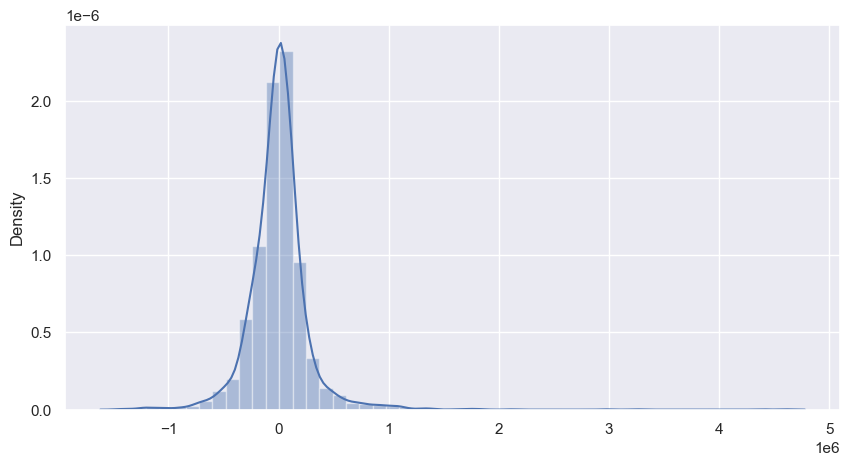

In [23]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

In [24]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)))

Mean Absolute Error: 174081.86
Mean Squared Error:85006895147.17
Root Mean Squared Error:291559.42
Variance score is: 0.69


In [25]:
# we are off about 20% (comparing mean absolut error and mean of price)
import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print(locale.currency(data["final_price"].mean(), grouping=True))

$761,788.10


In [26]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Linear Regression Model:
Train Score 0.74
Test Score 0.69


## Method 2: Keras Regression

In [27]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [46]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    return model
model = create_model()

In [47]:
#model = create_model()
model = create_model()

# Compile model
model.compile(optimizer ='adam', loss = 'mse')

# Summary Model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2176      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=400, batch_size=128)

Epoch 1/400
57/57 [==============================] - 0s 1ms/step - loss: 844101451776.0000 - val_loss: 860968779776.0000
Epoch 2/400
57/57 [==============================] - 0s 855us/step - loss: 843669438464.0000 - val_loss: 859818295296.0000
Epoch 3/400
57/57 [==============================] - 0s 879us/step - loss: 840558510080.0000 - val_loss: 853670232064.0000
Epoch 4/400
57/57 [==============================] - 0s 874us/step - loss: 828824944640.0000 - val_loss: 834341044224.0000
Epoch 5/400
57/57 [==============================] - 0s 860us/step - loss: 797756096512.0000 - val_loss: 790337093632.0000
Epoch 6/400
57/57 [==============================] - 0s 848us/step - loss: 737466449920.0000 - val_loss: 711886176256.0000
Epoch 7/400
57/57 [==============================] - 0s 855us/step - loss: 639141347328.0000 - val_loss: 595862552576.0000
Epoch 8/400
57/57 [==============================] - 0s 852us/step - loss: 508675358720.0000 - val_loss: 458984882176.0000
Epoch 9/400
57/57 

<Axes: >

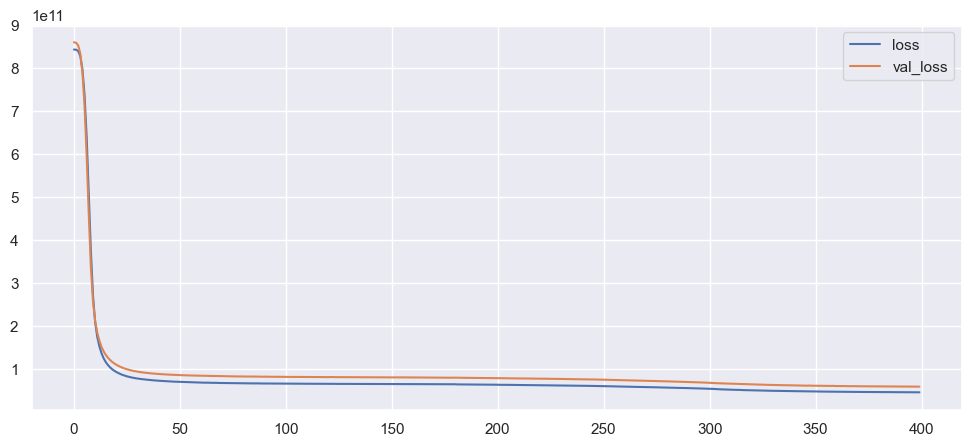

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,5))

## Evaluation on Test Data

In [50]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
y_pred = model.predict(X_test)

[INFO] predicting house prices...
111/111 [==============================] - 0s 327us/step


In [51]:
# evaluation metrics
# explained variance score: best possible score is 1 and lower values are worse
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 139297.86
Mean Squared Error: 58360382858.21
Root Mean Squared Error: 241578.94
Variance score is: 0.79


In [52]:
# we are off about 20% (comparing mean absolut error and mean of price)
import locale
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print(locale.currency(data["final_price"].mean(), grouping=True))

$761,788.10


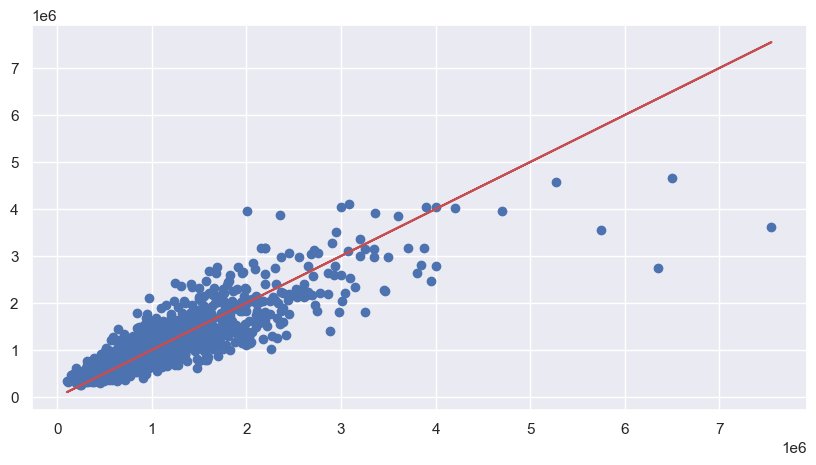

In [53]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## How we can use the model?

In [54]:
# let's drop price and keep first line featurs, then put those featur inside the model and estimae the price!
single_house = data.drop('final_price',axis = 1).iloc[0]

In [55]:
# need to apply featur scalling on those featurs
single_house = s_scaler.transform(single_house.values.reshape(-1,16))

In [57]:
# apply model on those featurs
model.predict(single_house)

1/1 [==============================] - 0s 13ms/step


array([[706871.4]], dtype=float32)

In [58]:
# compare the prediction with real price for the first column
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print(locale.currency(data["final_price"][0], grouping=True))

$855,000.00


## Multiple Linear Regression vs Keras Regression

In [59]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_predd)*100))

Model: Keras Regression

Mean Absolute Error(MAE): 139297.86
Mean Squared Error(MSE): 58360382858.21
Root Mean Squared Error(RMSE): 241578.94
Variance score: 78.74

*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 174081.86
Mean Squared Error(MSE):85006895147.17
Root Mean Squared Error(RMSE):291559.42
Variance score: 69.00
